In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('fixed_orders_orders.csv', index_col=0)

In [3]:
# Dataset is from orders made from Spetember 2020 - current (March 11 2021)

In [4]:
df.head()

,Orders Gross Price
Orders Order ID,
2629014913095,$198
2629034770503,$69
2629034770503,$39
2629058625607,$65
2629060165703,$99


In [5]:
df.columns = [col.replace(' ', '_').lower() for col in df.columns]
pd.set_option('display.float_format', lambda x: '%.2f' % x)
df[df.columns[0]] = df[df.columns[0]].replace('[\$,]', '', regex=True).astype(float)

In [6]:
df.head()

,orders_gross_price
Orders Order ID,
2629014913095,198.00
2629034770503,69.00
2629034770503,39.00
2629058625607,65.00
2629060165703,99.00


In [7]:
df['orders_gross_price'].describe()

count   119671.00
mean        92.77
std         39.09
min         10.00
25%         79.00
50%         79.00
75%         99.00
max        357.00
Name: orders_gross_price, dtype: float64

In [8]:
# Currently, there is a large percentage of orders with an amount value near the mean

In [9]:
df['orders_gross_price'].quantile(0.8)

99.0

In [10]:
df['orders_gross_price'].quantile(0.85)

138.0

In [11]:
df['orders_gross_price'].quantile(0.9)

158.0

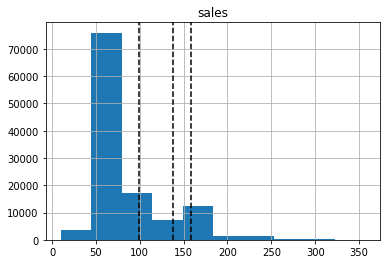

In [15]:
df.hist(column=['sales'])
plt.axvline(df["sales"].quantile(0.8), color='black',linestyle='--')
plt.axvline(df["sales"].quantile(0.85), color='black',linestyle='--')
plt.axvline(df["sales"].quantile(0.9), color='black',linestyle='--')
plt.title('sales')
plt.show()

In [ ]:
df1 = df[df["orders_gross_price"] > 99]

In [ ]:
df1['orders_gross_price'].describe()

count   23172.00
mean      161.06
std        32.06
min       100.00
25%       138.00
50%       158.00
75%       168.00
max       357.00
Name: orders_gross_price, dtype: float64

In [ ]:
df1['orders_gross_price'].quantile(0.5)

158.0

In [ ]:
df1['orders_gross_price'].quantile(0.7)

168.0

In [ ]:
df1['orders_gross_price'].quantile(0.9)

198.0

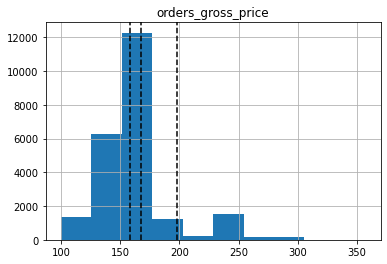

In [ ]:
df1.hist(column=['orders_gross_price'])
plt.axvline(df1["orders_gross_price"].quantile(0.5), color='black',linestyle='--')
plt.axvline(df1["orders_gross_price"].quantile(0.7), color='black',linestyle='--')
plt.axvline(df1["orders_gross_price"].quantile(0.9), color='black',linestyle='--')
plt.show()

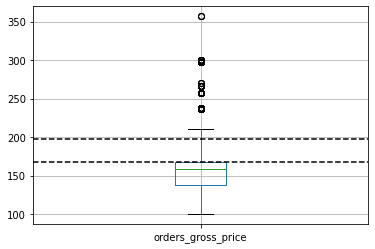

In [ ]:
df1.boxplot(column=['orders_gross_price'])
plt.axhline(df1["orders_gross_price"].quantile(0.8), color='black',linestyle='--')
plt.axhline(df1["orders_gross_price"].quantile(0.9), color='black',linestyle='--')
plt.show()

In [ ]:
# Currently, orders of $158 and above are in the top 10% of orders made in the past 7 months

In [ ]:
df2 = df1[df1["orders_gross_price"] == 158]

In [ ]:
df3 = df1[df1["orders_gross_price"] > 158]

In [ ]:
df4 = df1[df1["orders_gross_price"] >= 158]

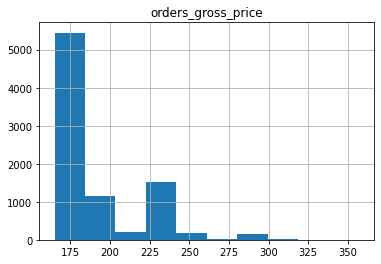

In [ ]:
df3.hist(column=['orders_gross_price'])
plt.show()

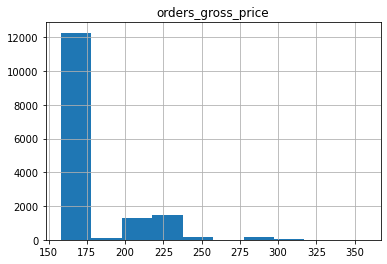

In [ ]:
df4.hist(column=['orders_gross_price'])
plt.show()

In [ ]:
df2.describe()

,orders_gross_price
count,6886.00
mean,158.00
std,0.00
min,158.00
25%,158.00
50%,158.00
75%,158.00
max,158.00


In [ ]:
df3.describe()

,orders_gross_price
count,8681.00
mean,189.84
std,32.51
min,165.00
25%,168.00
50%,168.00
75%,198.00
max,357.00


In [ ]:
df4.describe()

,orders_gross_price
count,15567.00
mean,175.76
std,28.97
min,158.00
25%,158.00
50%,168.00
75%,168.00
max,357.00


In [ ]:
# The price point of $158 has a count of 6886.
# Price points aboce $158 have a count of 8681
# Price point of $158 and above is count 15,567
# The TOTAL intiial count with all orders is 119,671

In [ ]:
print(8681/119671)
print(15567/119671)

0.0725405486709395
0.13008164049769785


In [ ]:
# Thus orders above the value of $158 take up 7.25% 
# Orders of $158 or more take up 13% os orders

13% of the top orders seems like a good fit for top spenders. Would reccomend $158 and above as a "top-spender" price point.